In [1]:
from glob import glob
import os, sys
from os.path import join, dirname

import datetime, time
import csv
from glob import glob
import chardet
import numpy as np
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

데이터 출처:  
https://fueleconomy.gov/feg/download.shtml  
result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory for 5 years(2018-2022)

In [2]:
root_dir = '../data'
data_list = glob(root_dir+'/*.xlsx')

In [3]:
data_list

['../data\\all_alpha_18.xlsx',
 '../data\\all_alpha_19.xlsx',
 '../data\\all_alpha_20.xlsx',
 '../data\\all_alpha_21.xlsx',
 '../data\\all_alpha_22.xlsx']

https://www.kaggle.com/code/debajyotipodder/basic-eda-of-the-co2-emissions-by-vehicle-dataset  
https://www.kaggle.com/code/multivacr/co2-emissions-for-cars-1995-2018

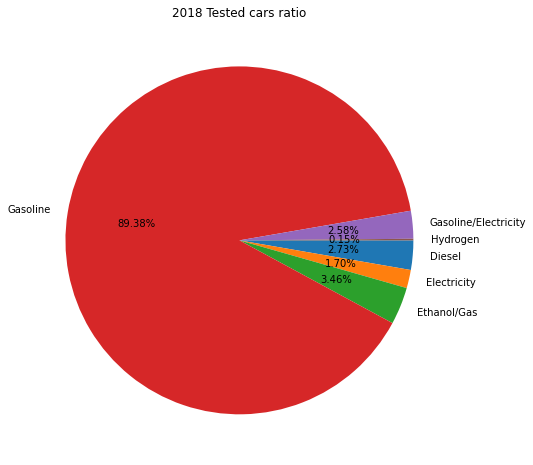

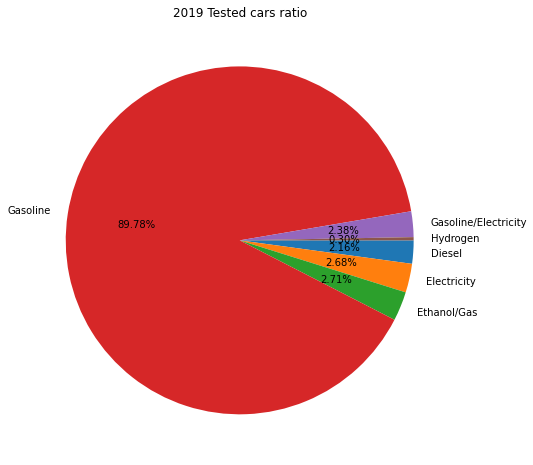

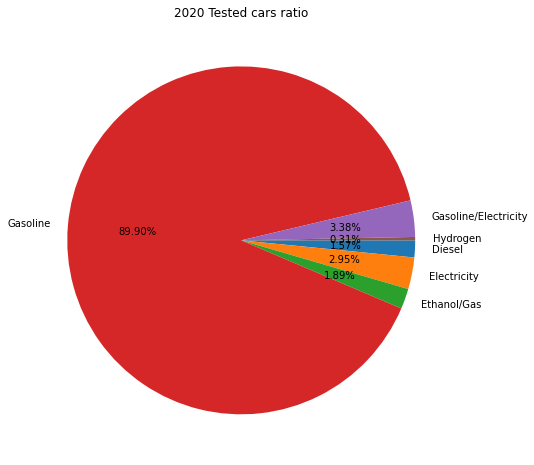

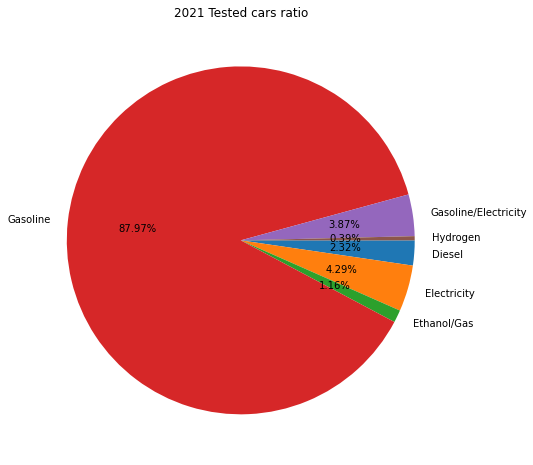

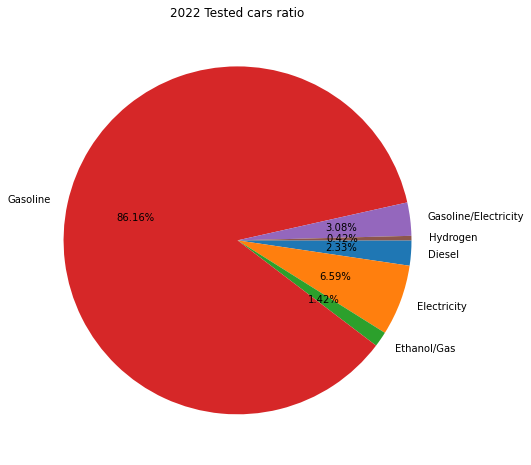

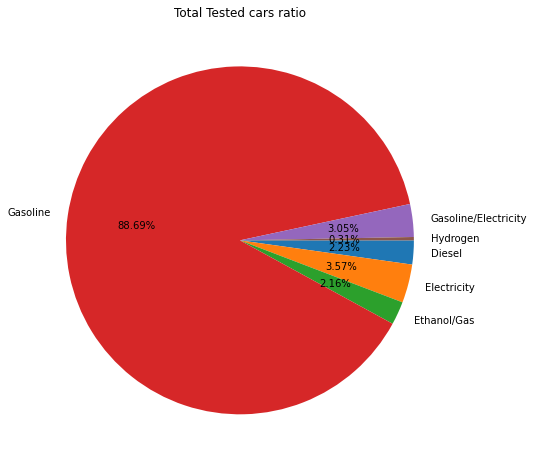

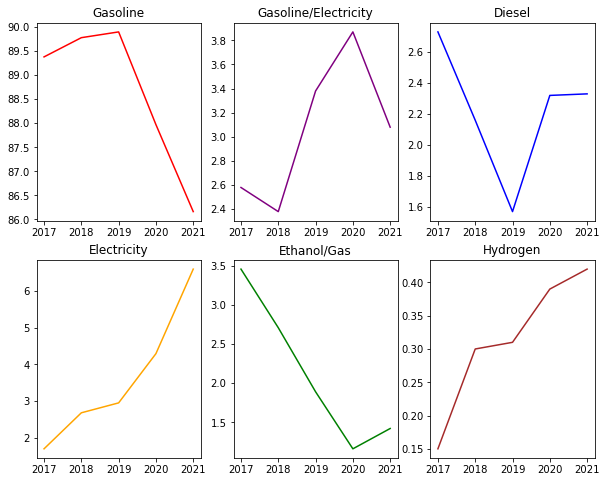

In [4]:
data = pd.DataFrame()
ratio = pd.DataFrame()

for name in data_list:
    
    temp = pd.read_excel(name, engine='openpyxl')
    data = data.append(temp, ignore_index=True) 

    label, count = np.unique(np.array(temp['Fuel']), return_counts=True)

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
    ax.set_title('20' + name.split('.')[-2][-2:] + ' ' + 'Tested cars ratio')
    ax.pie(count, labels = label, counterclock=False, autopct="%.2f%%")
    plt.show()
    
    count = np.round((count/len(temp) * 100), 2)
    temp_ratio  = pd.DataFrame([count], columns=label)
    ratio = ratio.append(temp_ratio, ignore_index=True) 


label, count = np.unique(np.array(data['Fuel']), return_counts=True)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_title('Total ' + 'Tested cars ratio')
ax.pie(count, labels = label, counterclock=False, autopct="%.2f%%")
plt.show()

years = ['2017','2018','2019','2020','2021']

plt.figure(figsize=(10,8))

ratio['Year'] = years
ratio = ratio.set_index(keys='Year', inplace=False, drop=True)
# print(ratio)
plt.subplot(2, 3, 1)
plt.plot(ratio['Gasoline'],  color='red')
plt.title('Gasoline')

plt.subplot(2, 3, 2)
plt.plot(ratio['Gasoline/Electricity'],  color='purple')
plt.title('Gasoline/Electricity')

plt.subplot(2, 3, 3)
plt.plot(ratio['Diesel'],  color='blue')
plt.title('Diesel')

plt.subplot(2, 3, 4)
plt.plot(ratio['Electricity'],  color='orange')
plt.title('Electricity')

plt.subplot(2, 3, 5)
plt.plot(ratio['Ethanol/Gas'],  color='green')
plt.title('Ethanol/Gas')

plt.subplot(2, 3, 6)
plt.plot(ratio['Hydrogen'],  color='brown')
plt.title('Hydrogen')
plt.show()

In [5]:
len(data)

12933

In [6]:
data = data.drop_duplicates()

In [7]:
col = list(data.columns)

In [8]:
data['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas', 'Hydrogen'], dtype=object)

In [19]:
gas = data[data['Fuel'] == 'Gasoline']
gas = gas.astype({'Comb CO2':'float64'})
avg_gas = np.mean(gas['Comb CO2'])

In [20]:
gas_elec = data[data['Fuel'] == 'Gasoline/Electricity']
gas_elec = gas_elec.astype({'Comb CO2':'float64'})
avg_gl = np.mean(gas_elec['Comb CO2'])

In [21]:
disel = data[data['Fuel'] == 'Diesel']
disel = disel.astype({'Comb CO2':'float64'})
avg_disel = np.mean(disel['Comb CO2'])

In [23]:
elec = data[data['Fuel'] == 'Electricity']
elec = elec.astype({'Comb CO2':'float64'})
avg_elec = np.mean(elec['Comb CO2'])

In [13]:
ethan_gas = data[data['Fuel'] == 'Ethanol/Gas']
# ethan_gas = ethan_gas.astype({'Comb CO2':'float64'})
# np.mean(ethan_gas['Comb CO2'])
list_ethan = ethan_gas.values

In [16]:
len(list_ethan)

279

In [14]:
ethan_arr = np.array(ethan_gas)
col.append('avg Comb CO2')
# print(col)
ethan_gas = pd.DataFrame(columns=col)

In [15]:
for row in list_ethan:
    avg = (int(row[17].split('/')[0]) + int(row[17].split('/')[1]))/2
    row = np.append(row, avg)
    row = pd.DataFrame([row], columns=col)
    ethan_gas= ethan_gas.append(row)
    
print(ethan_gas)

                               Model  Displ  Cyl       Trans Drive  \
0                   CHEVROLET Impala    3.6  6.0  SemiAuto-6   2WD   
0                   CHEVROLET Impala    3.6  6.0  SemiAuto-6   2WD   
0             CHEVROLET Silverado 15    4.3  6.0      Auto-6   2WD   
0             CHEVROLET Silverado 15    4.3  6.0      Auto-6   2WD   
0             CHEVROLET Silverado 15    4.3  6.0      Auto-6   4WD   
..                               ...    ...  ...         ...   ...   
0                         GMC Sierra    5.3  8.0      Auto-6   2WD   
0                         GMC Sierra    5.3  8.0      Auto-6   4WD   
0                         GMC Sierra    5.3  8.0      Auto-6   4WD   
0   GMC Sierra 4WD Mud Terrain Tires    5.3  8.0      Auto-6   4WD   
0   GMC Sierra 4WD Mud Terrain Tires    5.3  8.0      Auto-6   4WD   

           Fuel Cert Region       Stnd            Stnd Description  \
0   Ethanol/Gas          CA   L3ULEV70   California LEV-III ULEV70   
0   Ethanol/Gas    

In [24]:
avg_eg = np.mean(ethan_gas['avg Comb CO2'])

In [25]:
hydro = data[data['Fuel'] == 'Hydrogen']
hydro = hydro.astype({'Comb CO2':'float64'})
avg_hydro = np.mean(hydro['Comb CO2'])

In [26]:
avg_comb = [avg_gas, avg_gl, avg_disel, avg_elec, avg_eg, avg_hydro]

In [27]:
avg_comb

[403.3782911944202,
 173.81218274111674,
 406.72222222222223,
 0.0,
 466.3351254480287,
 0.0]

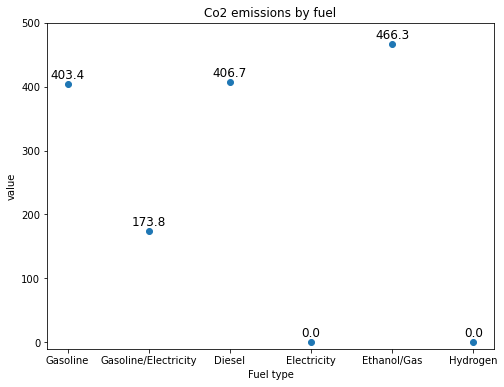

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(data['Fuel'].unique(),avg_comb)
plt.ylim(-10, 500)
plt.xlabel('Fuel type')
plt.ylabel('value')
plt.title('Co2 emissions by fuel')
for i in range(len(avg_comb)):
    height = avg_comb[i]
    plt.text(data['Fuel'].unique()[i], height + 5, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.show()